<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading-:" data-toc-modified-id="Data-Loading-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading :</a></span></li><li><span><a href="#Data-Screening-:" data-toc-modified-id="Data-Screening-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Screening :</a></span></li><li><span><a href="#Data-Pre-processing-:" data-toc-modified-id="Data-Pre-processing-:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Pre-processing :</a></span></li><li><span><a href="#Model-1:" data-toc-modified-id="Model-1:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model 1:</a></span></li><li><span><a href="#Further-Data-Pre-processing-:" data-toc-modified-id="Further-Data-Pre-processing-:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further Data Pre-processing :</a></span></li><li><span><a href="#Model-2-:" data-toc-modified-id="Model-2-:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model 2 :</a></span></li><li><span><a href="#Outlier-Handling-in-IQR-Method-:" data-toc-modified-id="Outlier-Handling-in-IQR-Method-:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Outlier Handling in IQR Method :</a></span></li><li><span><a href="#Model-3-:" data-toc-modified-id="Model-3-:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model 3 :</a></span></li><li><span><a href="#McFadden's-Pseudo-$R^{2}$-:" data-toc-modified-id="McFadden's-Pseudo-$R^{2}$-:-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>McFadden's Pseudo $R^{2}$ :</a></span></li><li><span><a href="#Predicted-probability-of-getting-the-Bank's-Product-Subscription-:" data-toc-modified-id="Predicted-probability-of-getting-the-Bank's-Product-Subscription-:-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Predicted probability of getting the Bank's Product Subscription :</a></span></li><li><span><a href="#Model-Assumptions-Checking-:" data-toc-modified-id="Model-Assumptions-Checking-:-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Model Assumptions Checking :</a></span></li></ul></div>

# Data Loading :

In [278]:
original_data <- read.csv('bank.csv')

In [279]:
#first 10 samples of the data ........
head(original_data, 10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no


In [280]:
dim(original_data)

[1] 45211    17

---------------------------

<b>Vaariable Descriptions :</b><br>
- Age
- Job
- Marital status
- Education
- Credit
- Housing : Has Mortgage
- Loan : has a personal loan?
- Contact communication type
- Day : Last contact day of the week
- Month
- Duration : last contact duration, in seconds (numeric).
- Campaign : number of contacts performed during this campaign and for this client
- pdays : number of days that passed by after the client was last contacted
- previous : number of contacts performed before this campaign and for this client
- poutcome : outcome of the previous marketing campaign
- y : has the client subscribed for the bank product

<b>observation 1 :</b><br>
- There is no variable called 'default' in the variable description insteed we have 'credit' in that place. So we need to change thar variable name to 'credit'

------

# Data Screening :

In [281]:
#overall structure of the data .........
str(original_data)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital  : chr  "married" "single" "married" "married" ...
 $ education: chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : chr  "yes" "yes" "yes" "yes" ...
 $ loan     : chr  "no" "no" "yes" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ y        : chr  "no" "no" "no" "no" ...


In [282]:
#descriptive statistic measures of the dataset .....
summary(original_data[,c(1,6,10,12:14)])

      age           balance            day           duration     
 Min.   :18.00   Min.   : -8019   Min.   : 1.00   Min.   :   0.0  
 1st Qu.:33.00   1st Qu.:    72   1st Qu.: 8.00   1st Qu.: 103.0  
 Median :39.00   Median :   448   Median :16.00   Median : 180.0  
 Mean   :40.94   Mean   :  1362   Mean   :15.81   Mean   : 258.2  
 3rd Qu.:48.00   3rd Qu.:  1428   3rd Qu.:21.00   3rd Qu.: 319.0  
 Max.   :95.00   Max.   :102127   Max.   :31.00   Max.   :4918.0  
    campaign          pdays      
 Min.   : 1.000   Min.   : -1.0  
 1st Qu.: 1.000   1st Qu.: -1.0  
 Median : 2.000   Median : -1.0  
 Mean   : 2.764   Mean   : 40.2  
 3rd Qu.: 3.000   3rd Qu.: -1.0  
 Max.   :63.000   Max.   :871.0  

In [283]:
#looking for the unique values in the 'job' variable ...... 
unique(original_data$job)

[1] "management"    "technician"    "entrepreneur"  "blue-collar"  
 [5] "unknown"       "retired"       "admin."        "services"     
 [9] "self-employed" "unemployed"    "housemaid"     "student"

In [284]:
#looking for the unique values in the 'marital' variable ......
unique(original_data$marital)

[1] "married"  "single"   "divorced"

In [285]:
#looking for the unique values in the 'education' variable ......
unique(original_data$education)

[1] "tertiary"  "secondary" "unknown"   "primary"

In [286]:
#looking for the unique values in the 'default' variable ......
unique(original_data$default)

[1] "no"  "yes"

In [287]:
#looking for the unique values in the 'housing' variable ......
unique(original_data$housing)

[1] "yes" "no"

In [288]:
#looking for the unique values in the 'loan' variable ......
unique(original_data$loan)

[1] "no"  "yes"

In [289]:
#looking for the unique values in the 'contact' variable ......
unique(original_data$contact)

[1] "unknown"   "cellular"  "telephone"

In [290]:
#looking for the unique values in the 'poutcome' variable ......
unique(original_data$poutcome)

[1] "unknown" "failure" "other"   "success"

In [291]:
#looking for the unique values in the 'y' variable ......
unique(original_data$y)

[1] "no"  "yes"

-----

<b>observations 2 :</b><br>
- There are 12 different catagories in the variable 'job' but it is defined as character type variable. So we can change the type into factor.
- There are only 3 different catagories in the variable 'marital' but it is defined as character type variable. So we can change the type into factor.
- Same thing holds for the 'education' variable but here we have only 4 different catagories.
- The variable 'default' is binary response type variable and we can change the data type from character to factor.
- Judging the minimum and the maximum values in the 'balance' column we can say that there is a chance of the presence of outlier in that.
- The variables 'housing' and 'loan' are binary response type variables and we can change the data type from character to factor.
- The variable 'contact' has only 3 different types of catagories and hence we should consider this as a factor type variable.
- Judging the minimum and the maximum values in the 'duration' column we can say that there is a chance of the presence of outlier in that.
- outlier may present in the 'campaign', 'pdays', 'previous' variables.
- There are only 4 different catagories in the variable 'poutcome' but it is defined as character type variable. So we can change the type into factor.
- The variable 'y' is binary response type variable and we can change the data type from character to factor.
 


----

# Data Pre-processing :

In [292]:
#there is no variable called 'default' in the variable description. so renaming it to 'credit'.. 
#..as it seems like a mistake

colnames(original_data)[5] ="credit"

#checking the column names ...
names(original_data)

[1] "age"       "job"       "marital"   "education" "credit"    "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "y"

In [293]:
# changing some of the variable types from character to factors as per the above observations .....

original_data$job <- as.factor(original_data$job)
original_data$marital <- as.factor(original_data$marital)
original_data$education <- as.factor(original_data$education)
original_data$credit <- as.factor(original_data$credit)
original_data$housing <- as.factor(original_data$housing)
original_data$loan <- as.factor(original_data$loan)
original_data$contact <- as.factor(original_data$contact)
original_data$poutcome <- as.factor(original_data$poutcome)
original_data$y <- as.factor(original_data$y)


In [294]:
#new structure of the dataset ......
str(original_data)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ credit   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : 

In [295]:
#checking for any NA values .....
data.frame(colSums(is.na(original_data)))

,colSums.is.na.original_data..
,<dbl>
age,0
job,0
marital,0
education,0
credit,0
balance,0
housing,0
loan,0
contact,0


----

<b>observation 3 :</b><br>
- There is no NA values in the dataset.

-----

In [296]:
# storing the original_data into DATA so that any changes in DATA doesnot affect the original_data ....
DATA <- original_data

In [297]:
# storing the variable names in the variable_names .....
variable_names <- colnames(DATA)
variable_names

[1] "age"       "job"       "marital"   "education" "credit"    "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "y"

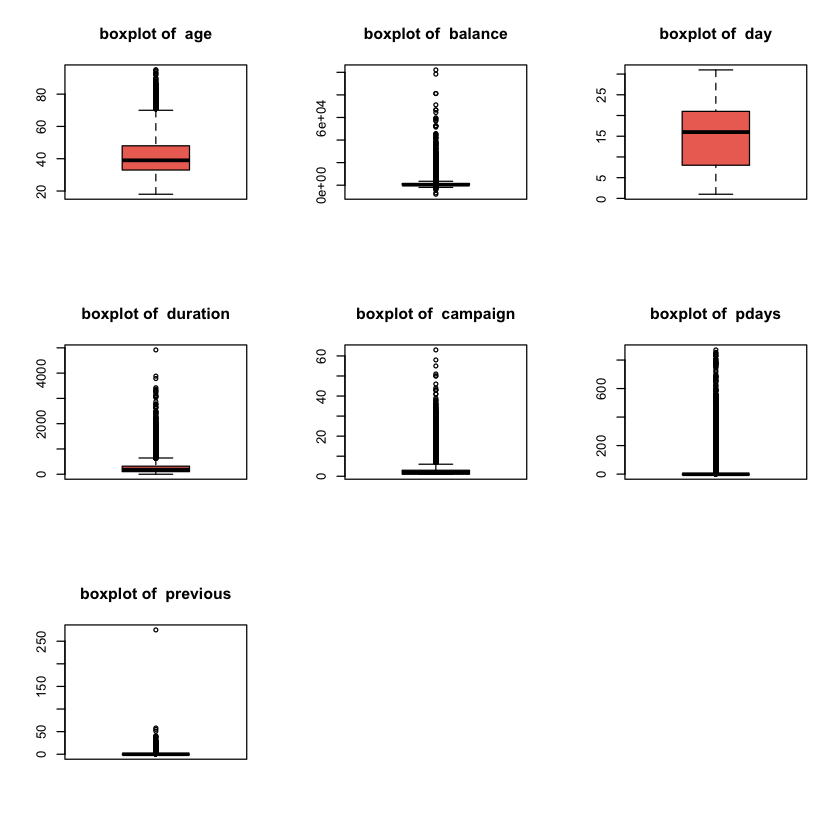

In [298]:
# checking for outliers as per the observation 2 ..........

par(mfrow = c(3,3))

for (i in c(1,6,10,12:15)){
    boxplot(DATA[,i], main = (paste('boxplot of ', variable_names[i])), col = '#EC7063')
}

In [299]:
#Checking the proportions of 'no's and 'yes's in our target variable...
library('tidyverse')

 DATA %>%                         
    group_by(y) %>% 
    summarise(freq = n()) %>% 
    mutate(prop = freq/nrow(DATA)) 

y,freq,prop
<fct>,<int>,<dbl>
no,39922,0.8830152
yes,5289,0.1169848


------

<b>observations 4 : </b></br>
- From the boxplots, it is clear that the variables 'balance', 'duration', 'campaign', 'pdays' and 'previous' have outliers. Some of them has influencial outliers.
- The data is highly imbalanced since we have only 88% 'no's and 12% 'yes's in the binary response variable. So we nned to use stratified random sampling while spliting the data into train and test set so that the proportionality of each response could be maintained. But before statification we should perform downsample for the responses which are 'no' in the target variable otherwise the balancy would not be gained.

------

# Model 1:

<b>Description :</b></br>
- This is a naive binary logistic regression model since all the variables have been incorporated and no outliers have been removed from the dataset. 

In [300]:
logistic_1 <- glm(y ~ ., data = DATA, family = 'binomial')

In [301]:
summary(logistic_1)


Call:
glm(formula = y ~ ., family = "binomial", data = DATA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7286  -0.3744  -0.2530  -0.1502   3.4288  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.536e+00  1.837e-01 -13.803  < 2e-16 ***
age                 1.127e-04  2.205e-03   0.051 0.959233    
jobblue-collar     -3.099e-01  7.267e-02  -4.264 2.01e-05 ***
jobentrepreneur    -3.571e-01  1.256e-01  -2.844 0.004455 ** 
jobhousemaid       -5.040e-01  1.365e-01  -3.693 0.000221 ***
jobmanagement      -1.653e-01  7.329e-02  -2.255 0.024130 *  
jobretired          2.524e-01  9.722e-02   2.596 0.009436 ** 
jobself-employed   -2.983e-01  1.120e-01  -2.664 0.007726 ** 
jobservices        -2.238e-01  8.406e-02  -2.662 0.007763 ** 
jobstudent          3.821e-01  1.090e-01   3.505 0.000457 ***
jobtechnician      -1.760e-01  6.893e-02  -2.554 0.010664 *  
jobunemployed      -1.767e-01  1.116e-01  -1.583 0.113456    
job

In [302]:
table(DATA$y)


   no   yes 
39922  5289 

In [303]:
predicted_1 <- round(fitted(logistic_1))
actual_1 <- DATA$y
confusion_matrix_1 <- xtabs(~actual_1 + predicted_1)
confusion_matrix_1

        predicted_1
actual_1     0     1
     no  38940   982
     yes  3456  1833

In [304]:
accuracy_1 <- sum(diag(confusion_matrix_1))/sum(confusion_matrix_1)
accuracy_1

[1] 0.901838

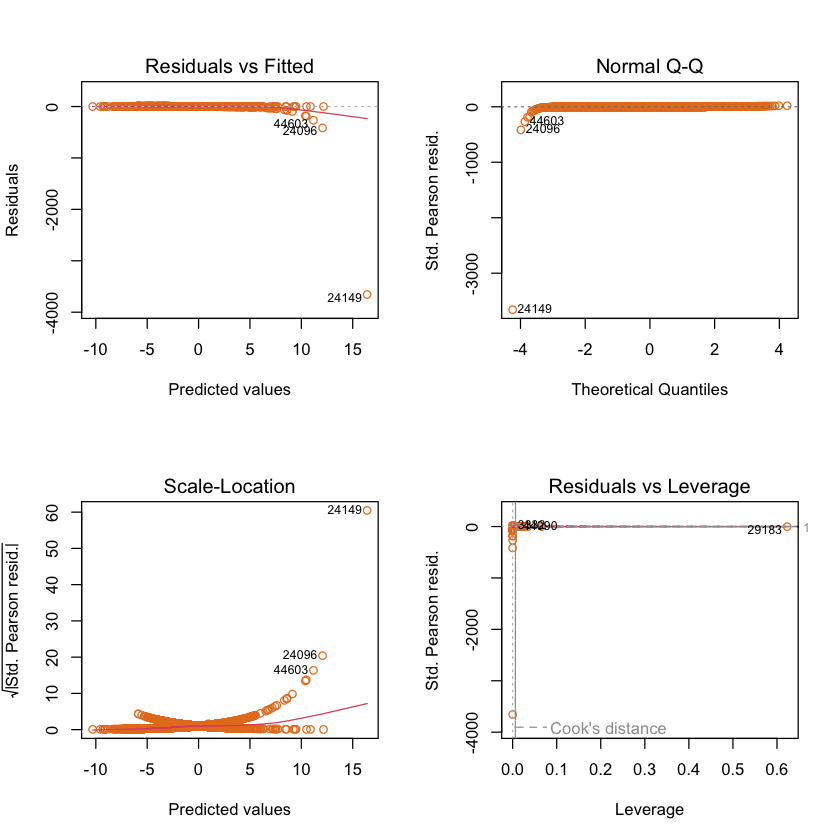

In [305]:
par(mfrow = c(2,2))
plot(logistic_1, col = '#E67E22')

------

<b>Model_1 observtions :</b></br>
- Model 1 is based on the imbalanced binary response variable. So we can perform WALD test to indentify which of the variables have significant affect on the response variable.
- Model accuracy is quite hifh but this can be due to the imbalancy in the response variable.
- Deviance Residuals are not kind of symmetric about zero instead it is roughly right skewed. 
- It is very clear that some the samples like '24149'th, '24096'th, '29183'th are the influencial outliers which need to be handled.

------

# Further Data Pre-processing :

<b>Statistical Tests for Individual Predictors<br>
Wald Test</b><br>
A wald test is used to evaluate the statistical significance of each coefficient in the model and is calculated by taking the ratio of the square of the regression coefficient to the square of the standard error of the coefficient. The idea is to test the hypothesis that the coefficient of an independent variable in the model is significantly different from zero. If the test fails to reject the null hypothesis, this suggests that removing the variable from the model will not substantially harm the fit of that model.

<b>Website : </b> <br>
- code : https://www.r-bloggers.com/2015/08/evaluating-logistic-regression-models/#:~:text=Wald%20Test,standard%20error%20of%20the%20coefficient.
- concept : https://stats.stackexchange.com/questions/60074/wald-test-for-logistic-regression 
<br><b>Reference : </b> <br>
[The Wald statistic is defined as (e.g. Wasserman (2006): All of Statistics, pages 153, 214-215)]

In [306]:
# install.packages('survey')
library('survey')

regTermTest(logistic_1, "age")
regTermTest(logistic_1, "job")
regTermTest(logistic_1, "marital")
regTermTest(logistic_1, "education")
regTermTest(logistic_1, "credit")
regTermTest(logistic_1, "balance")
regTermTest(logistic_1, "housing")
regTermTest(logistic_1, "loan")
regTermTest(logistic_1, "contact")
regTermTest(logistic_1, "day")
regTermTest(logistic_1, "month")
regTermTest(logistic_1, "duration")
regTermTest(logistic_1, "campaign")
regTermTest(logistic_1, "pdays")
regTermTest(logistic_1, "previous")
regTermTest(logistic_1, "poutcome")



Wald test for age
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  0.002612812  on  1  and  45168  df: p= 0.95923 

Wald test for job
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  8.960841  on  11  and  45168  df: p= 3.5831e-16 

Wald test for marital
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  19.37737  on  2  and  45168  df: p= 3.8737e-09 

Wald test for education
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  9.081013  on  3  and  45168  df: p= 5.2556e-06 

Wald test for credit
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  0.01049419  on  1  and  45168  df: p= 0.91841 

Wald test for balance
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  6.217302  on  1  and  45168  df: p= 0.012654 

Wald test for housing
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  237.0202  on  1  and  45168  df: p= < 2.22e-16 

Wald test for loan
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  50.27832  on  1  and  45168  df: p= 1.3537e-12 

Wald test for contact
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  246.1354  on  2  and  45168  df: p= < 2.22e-16 

Wald test for day
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  15.9438  on  1  and  45168  df: p= 6.5354e-05 

Wald test for month
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  95.15723  on  11  and  45168  df: p= < 2.22e-16 

Wald test for duration
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  4223.166  on  1  and  45168  df: p= < 2.22e-16 

Wald test for campaign
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  80.20024  on  1  and  45168  df: p= < 2.22e-16 

Wald test for pdays
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  0.112542  on  1  and  45168  df: p= 0.73727 

Wald test for previous
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  2.437352  on  1  and  45168  df: p= 0.11848 

Wald test for poutcome
 in glm(formula = y ~ ., family = "binomial", data = DATA)
F =  377.586  on  3  and  45168  df: p= < 2.22e-16 

<b>Variable Importance</b><br>
To assess the relative importance of individual predictors in the model, we can also look at the absolute value of the t-statistic for each model parameter. This technique is utilized by the varImp function in the caret package for general and generalized linear models.

In [307]:
library(caret)
varImp(logistic_1)

,Overall
,<dbl>
age,0.05111568
jobblue-collar,4.26415302
jobentrepreneur,2.84398758
jobhousemaid,3.69315796
jobmanagement,2.25505177
jobretired,2.59585566
jobself-employed,2.66380060
jobservices,2.66219429
jobstudent,3.50487090


----

<b>observations 5 :</b><br>
- Variables of interest (i.e variables which has significant affect on the target variable) : 'job' (need to check for the factors unemployed and unknown), 'marital' (need to check for the factor single), 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month' (need to check for the factor february), 'poutcome' (need to check for the factor unknown) 

- Insignificant Variables : 'age', 'credit', 'pdays', 'previous' (clear from the WALD test and the model_1 p-values) 

-----

In [308]:
#considering only the variables of interest .............

variables_of_interest <- DATA[,-c(1,5,14,15)]
head(variables_of_interest, 10)

,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<chr>,<int>,<int>,<fct>,<fct>
1,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,unknown,no
2,technician,single,secondary,29,yes,no,unknown,5,may,151,1,unknown,no
3,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,unknown,no
4,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,unknown,no
5,unknown,single,unknown,1,no,no,unknown,5,may,198,1,unknown,no
6,management,married,tertiary,231,yes,no,unknown,5,may,139,1,unknown,no
7,management,single,tertiary,447,yes,yes,unknown,5,may,217,1,unknown,no
8,entrepreneur,divorced,tertiary,2,yes,no,unknown,5,may,380,1,unknown,no
9,retired,married,primary,121,yes,no,unknown,5,may,50,1,unknown,no


In [309]:
# removing'24149'th, '24096'th, '29183'th sample from the dataset as from Model_1 observations they are..
# ..influencial outliers which need to be handled.

outlier_free_data <- variables_of_interest[-c(24096,24149,29183),]

In [310]:
# varifying that whether the outliers has been removed or not .....

dim(variables_of_interest)
dim(outlier_free_data)        #so yes, 3 samples (outliers) have been removed from the dataset      

[1] 45211    13

[1] 45208    13

# Model 2 :

In [311]:
logistic_2 <- glm(y ~ . , data = outlier_free_data, family = 'binomial')

In [312]:
summary(logistic_2)


Call:
glm(formula = y ~ ., family = "binomial", data = outlier_free_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7490  -0.3737  -0.2521  -0.1492   3.4320  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.538e+00  1.300e-01 -19.527  < 2e-16 ***
jobblue-collar     -3.161e-01  7.269e-02  -4.348 1.37e-05 ***
jobentrepreneur    -3.643e-01  1.256e-01  -2.901 0.003720 ** 
jobhousemaid       -5.104e-01  1.363e-01  -3.745 0.000180 ***
jobmanagement      -1.694e-01  7.330e-02  -2.311 0.020829 *  
jobretired          2.483e-01  8.749e-02   2.839 0.004529 ** 
jobself-employed   -3.041e-01  1.121e-01  -2.712 0.006692 ** 
jobservices        -2.289e-01  8.415e-02  -2.720 0.006529 ** 
jobstudent          3.805e-01  1.071e-01   3.551 0.000384 ***
jobtechnician      -1.778e-01  6.897e-02  -2.577 0.009954 ** 
jobunemployed      -1.833e-01  1.118e-01  -1.640 0.101065    
jobunknown         -3.180e-01  2.334e-01  -1.362 0.1

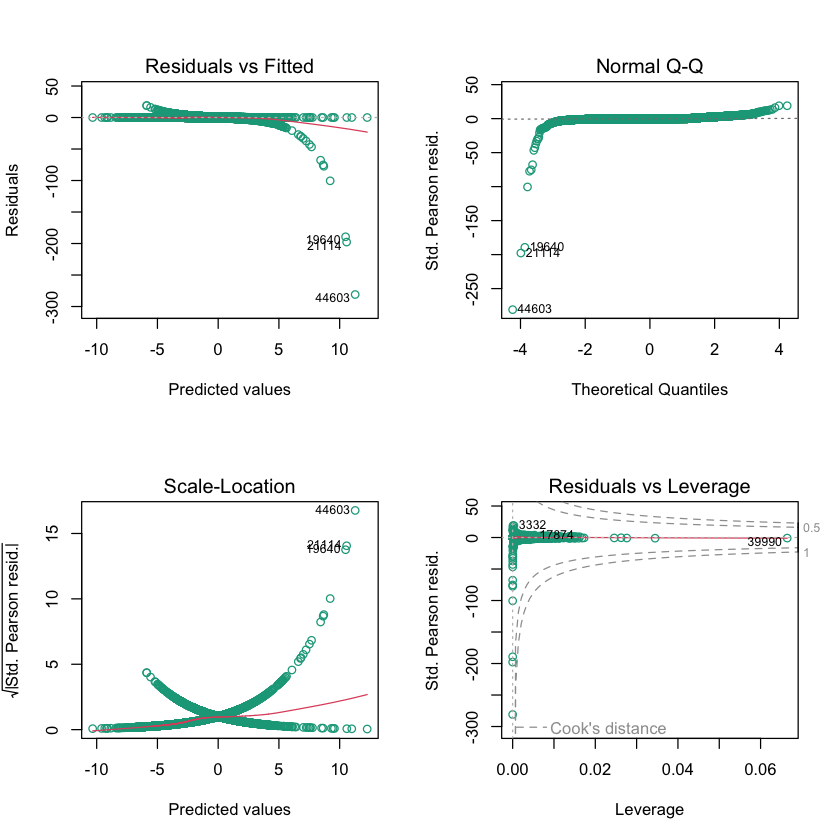

In [313]:
par(mfrow = c(2,2))
plot(logistic_2, col = '#17A589')

In [314]:
predicted_2 <- round(fitted(logistic_2))
actual_2 <- outlier_free_data$y
confusion_matrix_2 <- xtabs(~actual_2 + predicted_2)
confusion_matrix_2

        predicted_2
actual_2     0     1
     no  38933   986
     yes  3449  1840

In [315]:
accuracy_2<- sum(diag(confusion_matrix_2))/sum(confusion_matrix_2)
accuracy_2

[1] 0.9018979

-----

<b>observation 6 :</b><br>
- confusion matrix and accuracy have not improved. 
- Juding by the residual vs fitted plot and scale location curve we can understand that there are still a lot of influential outliers in the dataset. 

-----

# Outlier Handling in IQR Method :

In [316]:
numeric_variables_of_interest <- names(outlier_free_data)
numeric_variables_of_interest

[1] "job"       "marital"   "education" "balance"   "housing"   "loan"     
 [7] "contact"   "day"       "month"     "duration"  "campaign"  "poutcome" 
[13] "y"

In [317]:
#detecting outliers using IQR method ..................
is_outlier <- function(x, na.rm = FALSE)                   #creating a function to detect outlier using IQR method.
{                                                          #in the function 'x' is a vector quantity
  qs = quantile(x, probs = c(0.25, 0.75), na.rm = na.rm)
  lowerq <- qs[1]
  upperq <- qs[2]
  iqr = upperq - lowerq 
  extreme_threshold_upper = (iqr * 3) + upperq
  extreme_threshold_lower = lowerq - (iqr * 3)  
  x > extreme_threshold_upper | x < extreme_threshold_lower         # Return logical vector 
}
#detecting the number of outliers using the above defined function ...............................
for (i in c(4,8,10,11)){                           #here number of datapoints under TRUE represent the Outliers 
    cat("Number of Outliers in variable ", numeric_variables_of_interest[i]," :")
    print(table(is_outlier(outlier_free_data[,i])))
}

Number of Outliers in variable  balance  :
FALSE  TRUE 
42766  2442 
Number of Outliers in variable  day  :
FALSE 
45208 
Number of Outliers in variable  duration  :
FALSE  TRUE 
44055  1153 
Number of Outliers in variable  campaign  :
FALSE  TRUE 
43746  1462 


In [318]:
#removing the Outliers from the data .........................................

remove_outliers <- function(df, cols = names(df)) {       #creating a function to remove the outliers from the dataset
  for (col in cols) {
    cat("Removing outliers in column: ", col, " \n")
    df <- df[!is_outlier(df[[col]]),]                     #filtering those rows only where no outliers are there 
  }
  df
}

outlier_free_data_2 <- remove_outliers(outlier_free_data, numeric_variables_of_interest[c(4,8,10,11)])    
                                                                               #finally outlier free dataset

tail(outlier_free_data_2,20)                                     #showing last 20 rows in the outlier free data
dim(outlier_free_data)                                    #before removing outliers we had 45208 rows 
dim(outlier_free_data_2)                             #after removing outliers we have 40304 rows.. so in total 
                                                   #(45208-40304)= 4904 outliers have been removed     

Removing outliers in column:  balance  
Removing outliers in column:  day  
Removing outliers in column:  duration  
Removing outliers in column:  campaign  


,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<chr>,<int>,<int>,<fct>,<fct>
45188,services,single,secondary,1168,yes,no,cellular,16,nov,411,1,unknown,yes
45189,management,single,secondary,703,yes,no,cellular,16,nov,236,1,success,yes
45190,services,single,secondary,199,no,no,cellular,16,nov,173,1,failure,no
45191,blue-collar,married,secondary,136,no,no,cellular,16,nov,206,1,success,yes
45192,retired,divorced,tertiary,3810,yes,no,cellular,16,nov,262,1,failure,yes
45193,management,single,tertiary,765,no,no,cellular,16,nov,238,1,unknown,yes
45194,self-employed,single,tertiary,159,no,no,cellular,16,nov,449,2,success,yes
45195,management,married,tertiary,138,yes,yes,cellular,16,nov,162,2,failure,no
45196,retired,married,secondary,1146,no,no,cellular,16,nov,212,1,success,yes


[1] 45208    13

[1] 40304    13

# Model 3 :

In [319]:
logistic_3 <- glm(y ~ . , data = outlier_free_data_2, family = 'binomial')

In [320]:
summary(logistic_3)


Call:
glm(formula = y ~ ., family = "binomial", data = outlier_free_data_2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1563  -0.3431  -0.2149  -0.1235   3.5665  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -3.070e+00  1.469e-01 -20.902  < 2e-16 ***
jobblue-collar     -3.094e-01  8.058e-02  -3.840 0.000123 ***
jobentrepreneur    -4.685e-01  1.446e-01  -3.240 0.001196 ** 
jobhousemaid       -3.844e-01  1.493e-01  -2.575 0.010037 *  
jobmanagement      -1.625e-01  8.097e-02  -2.007 0.044732 *  
jobretired          2.600e-01  9.676e-02   2.687 0.007215 ** 
jobself-employed   -3.712e-01  1.267e-01  -2.930 0.003393 ** 
jobservices        -1.807e-01  9.296e-02  -1.944 0.051878 .  
jobstudent          4.875e-01  1.167e-01   4.177 2.96e-05 ***
jobtechnician      -1.694e-01  7.603e-02  -2.228 0.025857 *  
jobunemployed      -1.512e-01  1.230e-01  -1.229 0.218899    
jobunknown         -2.826e-01  2.585e-01  -1.093 0

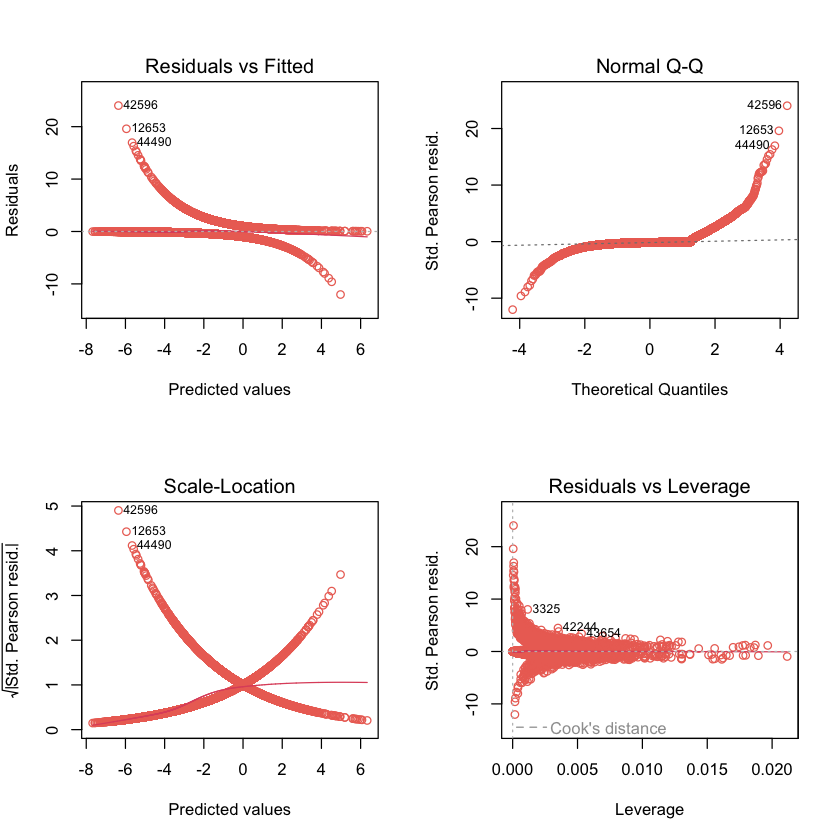

In [333]:
par(mfrow = c(2,2))
plot(logistic_3, col = '#EC7063')

In [322]:
predicted_3 <- round(fitted(logistic_3))
actual_3 <- outlier_free_data_2$y
confusion_matrix_3 <- xtabs(~actual_3 + predicted_3)
confusion_matrix_3

        predicted_3
actual_3     0     1
     no  35248   827
     yes  2763  1466

In [323]:
accuracy_3 <- sum(diag(confusion_matrix_3))/sum(confusion_matrix_3)
accuracy_3

[1] 0.910927

# McFadden's Pseudo $R^{2}$ :

<b>McFadden's Pseudo-$R^{2}$ :</b><br>
- The seminal reference that I can see for McFadden's pseudo 𝑅2 is: McFadden, D. (1974) “Conditional logit analysis of qualitative choice behavior.” Pp. 105-142 in P. Zarembka (ed.), Frontiers in Econometrics. Academic Press. http://eml.berkeley.edu/~mcfadden/travel.html Figure 5.5 shows the relationship between 𝜌2 and traditional 𝑅2 measures from OLS. My interpretation is that larger values of 𝜌2 (McFadden's pseudo 𝑅2) are better than smaller ones.

The interpretation of McFadden's pseudo 𝑅2 between 0.2-0.4 comes from a book chapter he contributed to: Bahvioural Travel Modelling. Edited by David Hensher and Peter Stopher. 1979. McFadden contributed Ch. 15 "Quantitative Methods for Analyzing Travel Behaviour on Individuals: Some Recent Developments". Discussion of model evaluation (in the context of multinomial logit models) begins on page 306 where he introduces 𝜌2 (McFadden's pseudo 𝑅2). McFadden states "while the 𝑅2 index is a more familiar concept to planner who are experienced in OLS, it is not as well behaved as the 𝜌2 measure, for ML estimation. Those unfamiliar with 𝜌2 should be forewarned that its values tend to be considerably lower than those of the 𝑅2 index...For example, values of 0.2 to 0.4 for 𝜌2 represent EXCELLENT fit."

So basically, 𝜌2 can be interpreted like 𝑅2, but don't expect it to be as big. And values from 0.2-0.4 indicate (in McFadden's words) excellent model fit.

Source - [https://stats.stackexchange.com/questions/82105/mcfaddens-pseudo-r2-interpretation]<br>
concept - [http://thestatsgeek.com/2014/02/08/r-squared-in-logistic-regression/]

In [324]:
#calculating the McFadden's Pseudo R-square value ......

ll_null <- logistic_3$null.deviance/-2

ll_proposed <- logistic_3$deviance/-2

(ll_null - ll_proposed)/ ll_null

[1] 0.3579981

In [325]:
#chi-square test to validate the psudo r-square value ......
1 - pchisq(2*(ll_proposed - ll_null), df = (length(logistic_3$coefficients)-1))

[1] 0

# Predicted probability of getting the Bank's Product Subscription :

In [326]:
predicted_data <- data.frame( probability_of_y = logistic_3$fitted.values, y = outlier_free_data_2$y)

predicted_data <- predicted_data[order(predicted_data$probability_of_y, decreasing = FALSE),]

predicted_data$rank <- 1:nrow(predicted_data)


In [327]:
head(predicted_data, 10)

,probability_of_y,y,rank
,<dbl>,<fct>,<int>
3583,0.0004650784,no,1
6524,0.0005189692,no,2
4631,0.0005297138,no,3
2296,0.0005726128,no,4
6971,0.0006056260,no,5
1503,0.0006267876,no,6
3432,0.0006821379,no,7
4279,0.0006842876,no,8
6748,0.0006872708,no,9


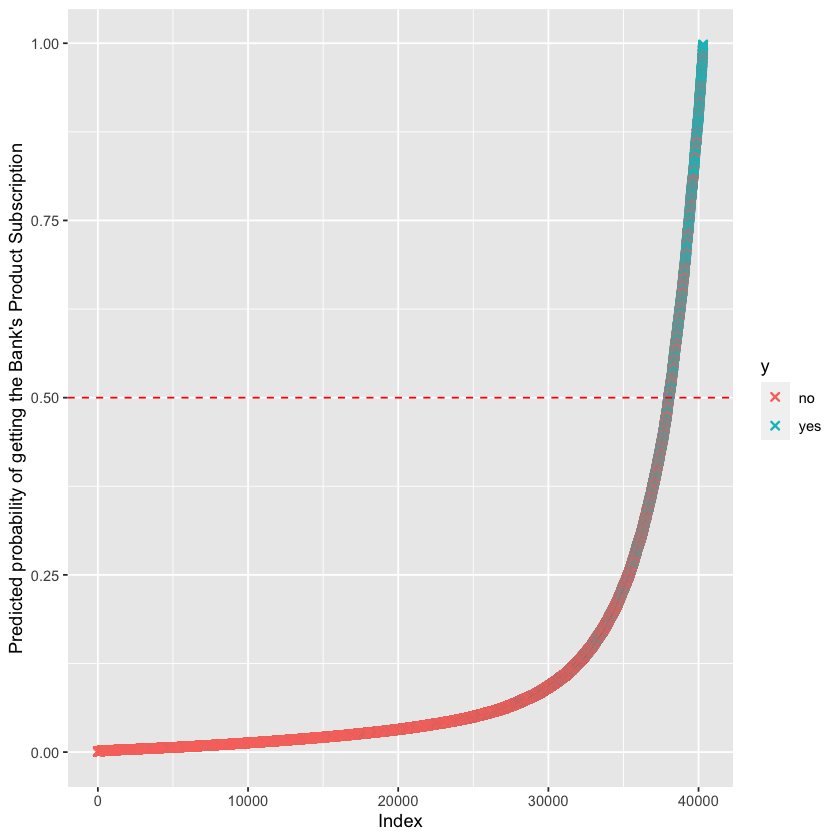

In [328]:
library(ggplot2)
library(cowplot)

ggplot(data = predicted_data, aes(x = rank, y = probability_of_y))+
    geom_point(aes(col=y), alpha=1, shape=4, stroke=1)+
    xlab("Index")+
    ylab("Predicted probability of getting the Bank's Product Subscription")+
    geom_hline(yintercept=0.50, linetype="dashed", 
                color = "red", size=0.5)
options(repr.plot.width = 7, repr.plot.height = 7)

# Model Assumptions Checking :

<b>1. Multicollinearity :</b><br>
- If two or more predictor variables are found to be highly linearly related to each other in a multiple logistic regression model, then Multicollinearity is said to be present in that model. Presence of multicollinearity could over fit the model performance. To check for multi-collinearity in the independent variables, the Variance Inflation Factor (VIF) technique is used. The variables with VIF score of >10 means that they are very strongly correlated. Therefore, they are discarded and excluded in the logistic regression model.

- In the following table, it is clear that the VIF score for all the explanatory variables are significantly less and hence we can conclude that there is no multicollinearity present in our binary logistic regression model. 



In [337]:
# install.packages('performance')
library(performance)

check_collinearity(logistic_3)

Term,VIF,VIF_CI_low,VIF_CI_high,SE_factor,Tolerance,Tolerance_CI_low,Tolerance_CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
job,2.906168,2.859808,2.953684,1.704749,0.3440957,0.3385603,0.3496739
marital,1.188024,1.175071,1.201935,1.089965,0.8417339,0.8319920,0.8510121
education,2.202450,2.169697,2.236120,1.484065,0.4540398,0.4472032,0.4608938
balance,1.049973,1.040319,1.061939,1.024682,0.9524051,0.9416734,0.9612435
housing,1.392645,1.375614,1.410448,1.180104,0.7180581,0.7089944,0.7269481
loan,1.058254,1.048322,1.070227,1.028715,0.9449527,0.9343810,0.9539052
contact,1.792838,1.768017,1.818460,1.338969,0.5577750,0.5499158,0.5656054
day,1.337420,1.321475,1.354156,1.156469,0.7477083,0.7384673,0.7567303
month,3.512423,3.454346,3.571874,1.874146,0.2847038,0.2799651,0.2894904


<b>2. The continuous variables have linearity against the log odds of the dependent variable :</b><br>
- To verify this assumption we have created the predicting probabilities and the logit variable. Then we have tried to visualize the relationship between them by scatter plot. In the following figure we can see that the continuous independent variables are sort of linearly related to the log odds of the dependent variable.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



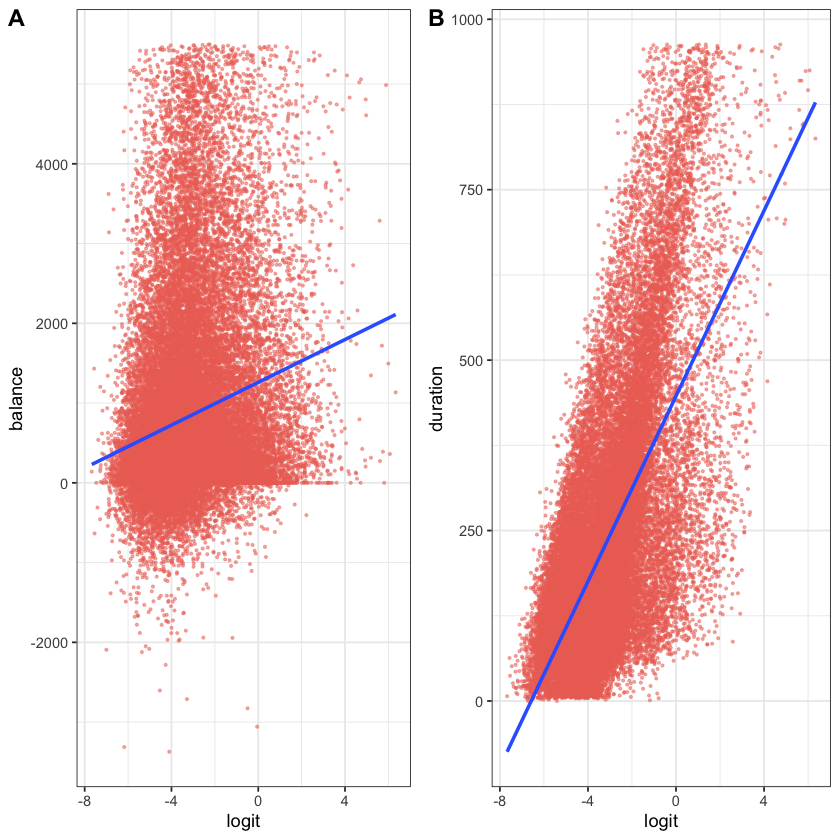

In [362]:
library(ggplot2)
library(cowplot)

#creating predicting probabilities and the logit variable ..........
probabilities <- predict(logistic_3, type = "response")
logit <- log(probabilities/(1-probabilities))

#ploting continuous variables namely 'balance' and 'duration' ..........

plot1 <- ggplot(data = outlier_free_data_2, aes(logit, balance))+
            geom_point(size = 0.5, alpha = 0.5, col = '#EC7063')+
            geom_smooth(method = "lm", se = FALSE)+
            theme_bw()

plot2 <- ggplot(data = outlier_free_data_2, aes(logit, duration))+
            geom_point(size = 0.5, alpha = 0.5, col = '#EC7063')+
            geom_smooth(method = "lm", se = FALSE)+
            theme_bw()

plot_grid(plot1, plot2, labels = "AUTO")

<b>3. Outlier Free Data :</b><br>
- Here we measured cook's distance to check the presence of possible outliers in the model data-set. Though we have removed outliers using IQR method but the following figure suggests that few of them are present in the data-set. But we have not removed those sample data due to the possible loss of information for modelling.   

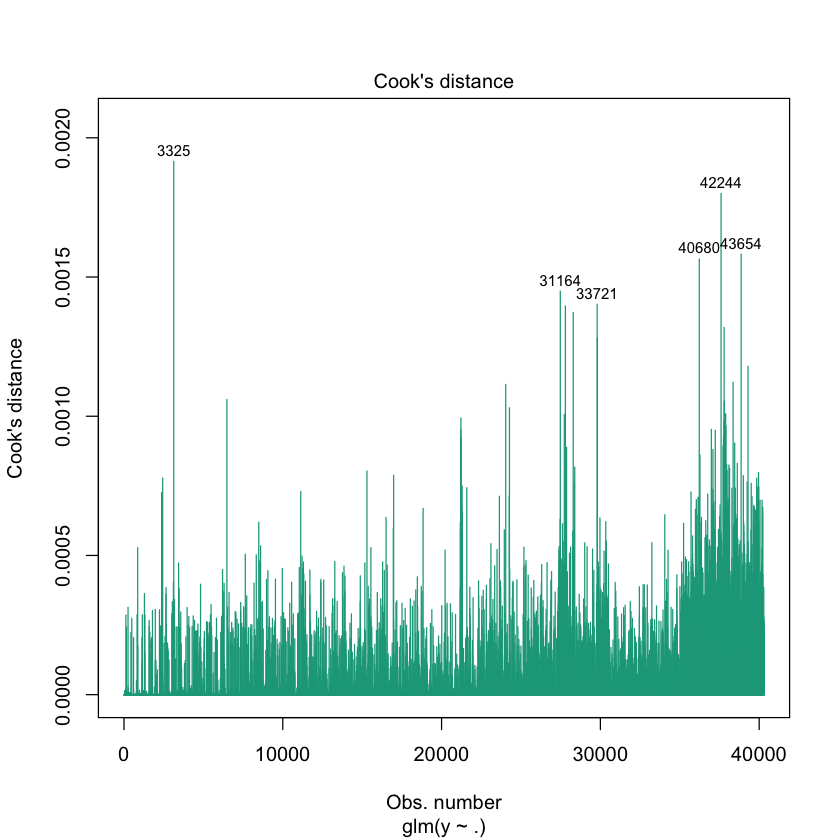

In [363]:
#cook's distance ............

plot(logistic_3, which = 4, id.n = 6, col = '#17A589')